##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

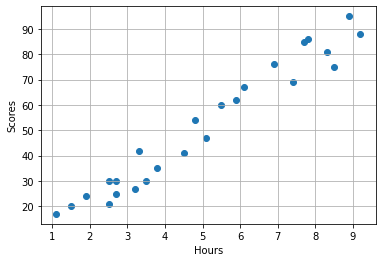

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection as sl
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt

df = pd.read_csv("SCORES.csv")
plt.scatter(df["Hours"], df["Scores"])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()



In [2]:
X = df['Hours']
y = df['Scores']
y=np.array(y)
X=np.array(X)

X_train, X_test, y_train, y_test = sl.train_test_split(X, y, test_size=0.3, random_state=42)
X_train=X_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)
LReg = LinearRegression()
LReg.fit(X_train, y_train)
print('coefficients: ',LReg.coef_, '\nIntercept: ',LReg.intercept_ )
y_pred = LReg.predict(X_test)


coefficients:  [[9.71054094]] 
Intercept:  [2.79419668]


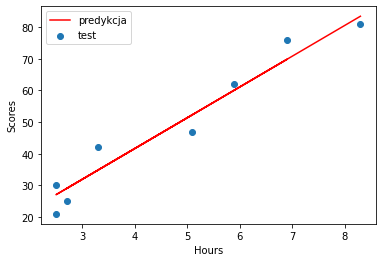

In [3]:

plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(['predykcja', 'test'])
plt.show()

In [4]:
mean_absolute_error = np.abs(y_test-y_pred).mean()
print("mean_absolute_error: ", mean_absolute_error)
mean_squared_error = ((y_test - y_pred)**2).mean()
print('mean_squared_error: ', mean_squared_error)
root_mean_squared_error = np.sqrt(mean_squared_error)
print('root_mean_squared_error: ', root_mean_squared_error)

mean_absolute_error:  4.499999999999998
mean_squared_error:  23.61945761415174
root_mean_squared_error:  4.859985351228103


SBP

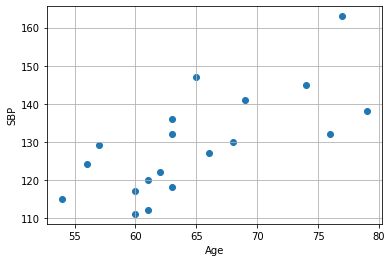

In [5]:
df = pd.read_csv("SBP.csv")
plt.scatter(df["Age"], df["SBP"])
plt.xlabel('Age')
plt.ylabel('SBP')
plt.grid()
plt.show()

In [6]:
X = df['Age']
y = df['SBP']
y=np.array(y)
X=np.array(X)

X_train, X_test, y_train, y_test = sl.train_test_split(X, y, test_size=0.3, random_state=42)
X_train=X_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)
LReg = LinearRegression()
LReg.fit(X_train, y_train)
print('coefficients: ',LReg.coef_, '\nIntercept: ',LReg.intercept_ )
y_pred = LReg.predict(X_test)

coefficients:  [[1.44882707]] 
Intercept:  [36.17936475]


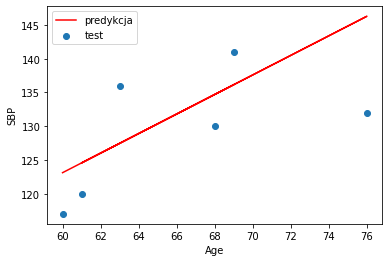

In [7]:
plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.xlabel('Age')
plt.ylabel('SBP')
plt.legend(['predykcja', 'test'])
plt.show()

In [8]:
mean_absolute_error = np.abs(y_test-y_pred).mean()
print("mean_absolute_error: ", mean_absolute_error)
mean_squared_error = ((y_test - y_pred)**2).mean()
print('mean_squared_error: ', mean_squared_error)
root_mean_squared_error = np.sqrt(mean_squared_error)
print('root_mean_squared_error: ', root_mean_squared_error)

mean_absolute_error:  7.175454985814118
mean_squared_error:  63.48947834957039
root_mean_squared_error:  7.968028510840708


Dla danych SBP wynik nie jest tak satysfakcjonujący jak dla danych SCORES. Mamy do czynienia z większymi błędami. Tutaj zastosowanie regresji liniowej nie pozwoli nam dobrze przewidzieć wyniku dla podanej wartości Age.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

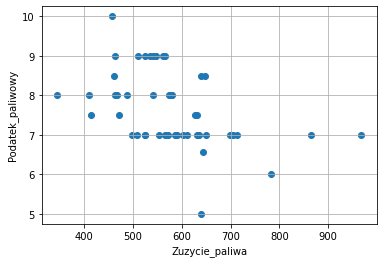

coefficients:  [[-0.00629873]] 
Intercept:  [11.31407242]


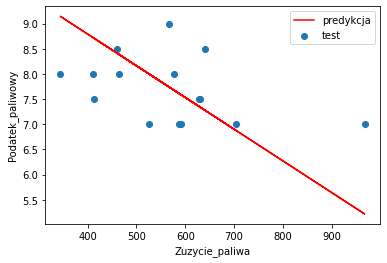

mean_absolute_error:  0.7179524412827296
mean_squared_error:  0.7733693038683115
root_mean_squared_error:  0.8794141822078556


In [18]:
df = pd.read_csv("PETROL.csv")
plt.scatter(df["Zuzycie_paliwa"], df["Podatek_paliwowy"])
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Podatek_paliwowy')
plt.grid()
plt.show()


X = df['Zuzycie_paliwa']
y = df['Podatek_paliwowy']
y=np.array(y)
X=np.array(X)

X_train, X_test, y_train, y_test = sl.train_test_split(X, y, test_size=0.3, random_state=42)
X_train=X_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)
LReg = LinearRegression()
LReg.fit(X_train, y_train)
print('coefficients: ',LReg.coef_, '\nIntercept: ',LReg.intercept_ )
y_pred = LReg.predict(X_test)


plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Podatek_paliwowy')
plt.legend(['predykcja', 'test'])
plt.show()


mean_absolute_error = np.abs(y_test-y_pred).mean()
print("mean_absolute_error: ", mean_absolute_error)
mean_squared_error = ((y_test - y_pred)**2).mean()
print('mean_squared_error: ', mean_squared_error)
root_mean_squared_error = np.sqrt(mean_squared_error)
print('root_mean_squared_error: ', root_mean_squared_error)


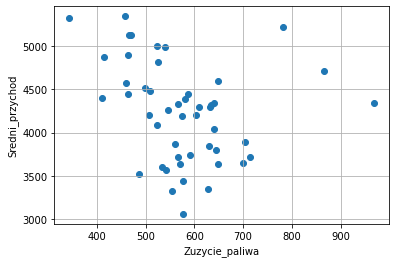

coefficients:  [[-0.75424815]] 
Intercept:  [4681.71098778]


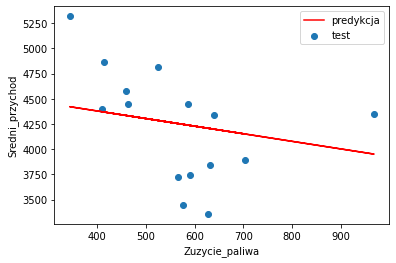

mean_absolute_error:  422.85691520778784
mean_squared_error:  247261.12027207803
root_mean_squared_error:  497.25357743517344


In [17]:
df = pd.read_csv("PETROL.csv")
plt.scatter(df["Zuzycie_paliwa"], df["Sredni_przychod"])
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Sredni_przychod')
plt.grid()
plt.show()


X = df['Zuzycie_paliwa']
y = df['Sredni_przychod']
y=np.array(y)
X=np.array(X)

X_train, X_test, y_train, y_test = sl.train_test_split(X, y, test_size=0.3, random_state=42)
X_train=X_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)
LReg = LinearRegression()
LReg.fit(X_train, y_train)
print('coefficients: ',LReg.coef_, '\nIntercept: ',LReg.intercept_ )
y_pred = LReg.predict(X_test)


plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Sredni_przychod')
plt.legend(['predykcja', 'test'])
plt.show()


mean_absolute_error = np.abs(y_test-y_pred).mean()
print("mean_absolute_error: ", mean_absolute_error)
mean_squared_error = ((y_test - y_pred)**2).mean()
print('mean_squared_error: ', mean_squared_error)
root_mean_squared_error = np.sqrt(mean_squared_error)
print('root_mean_squared_error: ', root_mean_squared_error)


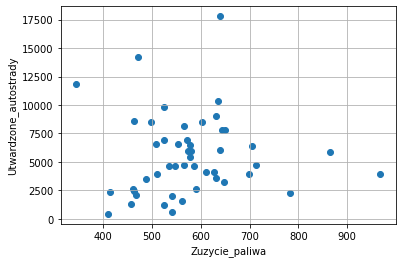

coefficients:  [[3.43639058]] 
Intercept:  [3684.56891792]


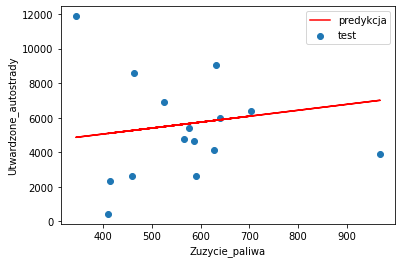

mean_absolute_error:  2371.18627442824
mean_squared_error:  8861905.900670558
root_mean_squared_error:  2976.895345938543


In [15]:
df = pd.read_csv("PETROL.csv")
plt.scatter(df["Zuzycie_paliwa"], df["Utwardzone_autostrady"])
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Utwardzone_autostrady')
plt.grid()
plt.show()


X = df['Zuzycie_paliwa']
y = df['Utwardzone_autostrady']
y=np.array(y)
X=np.array(X)

X_train, X_test, y_train, y_test = sl.train_test_split(X, y, test_size=0.3, random_state=42)
X_train=X_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)
LReg = LinearRegression()
LReg.fit(X_train, y_train)
print('coefficients: ',LReg.coef_, '\nIntercept: ',LReg.intercept_ )
y_pred = LReg.predict(X_test)


plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Utwardzone_autostrady')
plt.legend(['predykcja', 'test'])
plt.show()


mean_absolute_error = np.abs(y_test-y_pred).mean()
print("mean_absolute_error: ", mean_absolute_error)
mean_squared_error = ((y_test - y_pred)**2).mean()
print('mean_squared_error: ', mean_squared_error)
root_mean_squared_error = np.sqrt(mean_squared_error)
print('root_mean_squared_error: ', root_mean_squared_error)


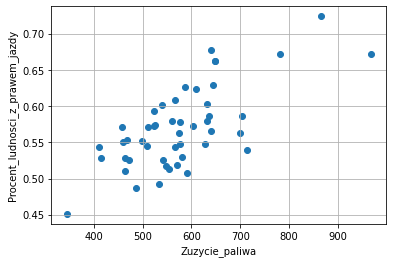

coefficients:  [[0.00040637]] 
Intercept:  [0.33692336]


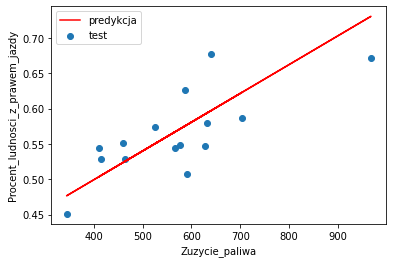

mean_absolute_error:  0.03634226432077138
mean_squared_error:  0.0017325932724006363
root_mean_squared_error:  0.0416244311961213


In [16]:
df = pd.read_csv("PETROL.csv")
plt.scatter(df["Zuzycie_paliwa"], df["Procent_ludnosci_z_prawem_jazdy"])
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Procent_ludnosci_z_prawem_jazdy')
plt.grid()
plt.show()


X = df['Zuzycie_paliwa']
y = df['Procent_ludnosci_z_prawem_jazdy']
y=np.array(y)
X=np.array(X)

X_train, X_test, y_train, y_test = sl.train_test_split(X, y, test_size=0.3, random_state=42)
X_train=X_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)
LReg = LinearRegression()
LReg.fit(X_train, y_train)
print('coefficients: ',LReg.coef_, '\nIntercept: ',LReg.intercept_ )
y_pred = LReg.predict(X_test)


plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Procent_ludnosci_z_prawem_jazdy')
plt.legend(['predykcja', 'test'])
plt.show()


mean_absolute_error = np.abs(y_test-y_pred).mean()
print("mean_absolute_error: ", mean_absolute_error)
mean_squared_error = ((y_test - y_pred)**2).mean()
print('mean_squared_error: ', mean_squared_error)
root_mean_squared_error = np.sqrt(mean_squared_error)
print('root_mean_squared_error: ', root_mean_squared_error)

Najlepsze wyniki uzyskujemy dla predyktora "Procent_ludnosci_z_prawem_jazdy" co logicznie przyjmuje charakter liniowy, gdy daną zależną jest zużycie paliwa.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [25]:
df = pd.read_csv("HEART.csv")
df.head(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0
7,32,1,2,125,254,0,0,155,0,0.0,?,?,?,0


In [26]:
df = df.where(df!='?', np.nan)
df.head(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0
5,32,0,2,105,198,0,0,165,0,0.0,NaN,NaN,NaN,0
6,32,1,2,110,225,0,0,184,0,0.0,NaN,NaN,NaN,0
7,32,1,2,125,254,0,0,155,0,0.0,NaN,NaN,NaN,0


In [30]:
df=df.drop(labels=['ca', 'slope', 'thal'], axis=1).dropna()
#display(df.info())
df.head(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0
6,32,1,2,110,225,0,0,184,0,0.0,0
7,32,1,2,125,254,0,0,155,0,0.0,0
8,33,1,3,120,298,0,0,185,0,0.0,0


In [31]:
df = pd.get_dummies(df, columns=['cp', 'restecg'])
df.head(8)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,0,1,0,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,0,1,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,1,0,0,0,0,1,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,0,1,0
5,32,0,105,198,0,165,0,0.0,0,0,1,0,0,1,0,0
6,32,1,110,225,0,184,0,0.0,0,0,1,0,0,1,0,0
7,32,1,125,254,0,155,0,0.0,0,0,1,0,0,1,0,0
8,33,1,120,298,0,185,0,0.0,0,0,0,1,0,1,0,0


In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

X = df.drop('num       ', axis=1)
y = df['num       ']

X_train, X_test, y_train, y_test = sl.train_test_split(X, y, test_size=0.2, random_state=42)

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)



LOReg = LogisticRegression()

LOReg.fit(X_train, y_train)
y_pred = LOReg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.73      0.80      0.76        20

    accuracy                           0.81        53
   macro avg       0.80      0.81      0.80        53
weighted avg       0.82      0.81      0.81        53

